In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [207]:
train = pd.read_csv("C://Users//Aswin//Hackathons//Loan Prediction - AV//train_ctrUa4K.csv")
test = pd.read_csv("C://Users//Aswin//Hackathons//Loan Prediction - AV//test_lAUu6dG.csv")

In [208]:
train.shape, test.shape

((614, 13), (367, 12))

In [209]:
train_og = train.copy()
test_og = test.copy()
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [210]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [211]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [212]:
train.describe(include = 'O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001116,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [213]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [214]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [215]:
train[(train['Loan_Status'] == 'Y') & (train['Gender'] == 'Female')].shape[0]/(train[train['Gender']=='Female'].shape[0])

0.6696428571428571

In [216]:
train[(train['Loan_Status'] == 'Y') & (train['Gender'] == 'Male')].shape[0]/(train[train['Gender']=='Male'].shape[0])

0.6932515337423313

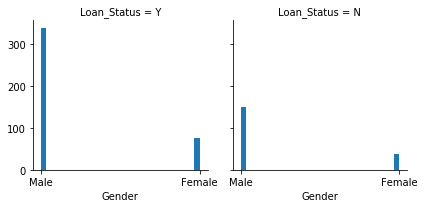

In [217]:
g = sns.FacetGrid(train, col = 'Loan_Status')
g.map(plt.hist, 'Gender', bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002109EF267C8>,
      dtype=object)

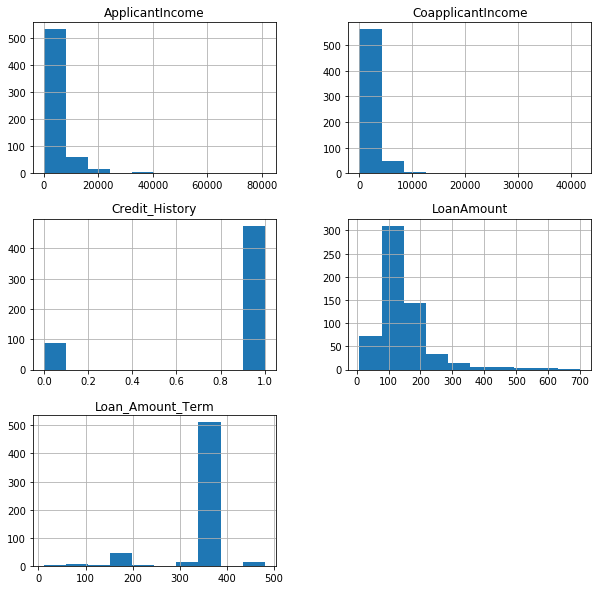

In [218]:
train.hist(figsize = (10,10))

In [219]:
train[(train['Married'] == "Yes") & (train['Loan_Status'] == 'Y')].shape[0]/(train['Loan_Status'] == 'Y').shape[0]

0.46416938110749184

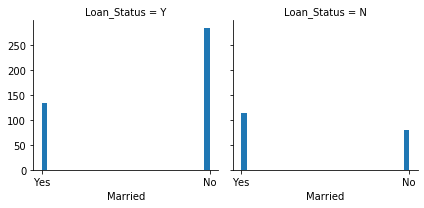

In [220]:
g = sns.FacetGrid(train, col = 'Loan_Status')
g.map(plt.hist, 'Married', bins = 30)
#If you were married, you had a higher chance of getting your loan approved

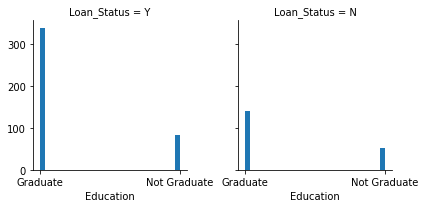

In [221]:
g = sns.FacetGrid(train, col = "Loan_Status")
g.map(plt.hist, 'Education', bins = 30)
#If you were educated, you had a higher chance of getting your loan approved

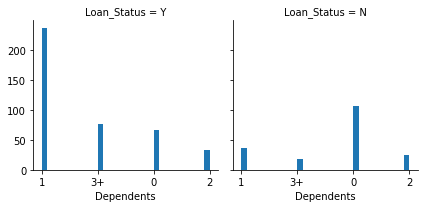

In [222]:
g = sns.FacetGrid(train, col = 'Loan_Status')
g.map(plt.hist, 'Dependents', bins = 30)
#It's better if you have 1 child while applying for loan xD

In [223]:
for i in train.columns:
    if(train[i].dtype == 'float64' or train[i].dtype == 'int64'):
        train[i] = train[i].fillna(train[i].median())
    else:
        train[i] = train[i].fillna(train[i].mode()[0])

In [224]:
for i in test.columns:
    if(test[i].dtype == 'float64' or test[i].dtype == 'int64'):
        test[i] = test[i].fillna(test[i].median())
    else:
        test[i] = test[i].fillna(test[i].mode()[0])

In [225]:
train['Dependents'] = train['Dependents'].map({'0' : 0, '1' : 1, '2' : 2, '3+' : 3}).astype(int)

In [226]:
train['Credit_History'] = train['Credit_History'].map({0.0 : 0, 1.0 : 1}).astype(int)

In [227]:
train['Property_Area'] = train['Property_Area'].map({'Rural' : 0, 'Semiurban' : 1, 'Urban' : 2}).astype(int)

In [228]:
train['Loan_Status'] = train['Loan_Status'].map({'Y' : 1, 'N' : 0}).astype(int)

In [229]:
test['Self_Employed'] = test['Self_Employed'].map({'No' : 0, 'Yes' : 1}).astype(int)

In [230]:
test['Credit_History'] = test['Credit_History'].map({0.0 : 0, 1.0 : 1}).astype(int)

In [231]:
test['Property_Area'] = test['Property_Area'].map({'Rural' : 0, 'Semiurban' : 1, 'Urban' : 2}).astype(int)

In [246]:
test['Education'] = test['Education'].map({'Graduate' : 1, 'Not Graduate' : 0}).astype(int)

In [232]:
test['Dependents'] = test['Dependents'].map({'0' : 0, '1' : 1, '2' : 2, '3+' : 3}).astype(int)

In [233]:
test['Gender'] = test['Gender'].map({'Male' : 1, 'Female' : 0}).astype(int)

In [234]:
train['Gender'] = train['Gender'].map({'Male' : 1, 'Female' : 0}).astype(int)
train['Married'] = train['Married'].map({'Yes' : 1, 'No' : 0}).astype(int)
train['Education'] = train['Education'].map({'Graduate' : 1, 'Not Graduate' : 0}).astype(int)
train['Self_Employed'] = train['Self_Employed'].map({'No' : 0, 'Yes' : 1}).astype(int)

In [235]:
test['Married'] = test['Married'].map({'Yes' : 1, 'No' : 0}).astype(int)

In [236]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1,2,1


In [237]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,Graduate,0,5720,0,110.0,360.0,1,2
1,LP001022,1,1,1,Graduate,0,3076,1500,126.0,360.0,1,2
2,LP001031,1,1,2,Graduate,0,5000,1800,208.0,360.0,1,2
3,LP001035,1,1,2,Graduate,0,2340,2546,100.0,360.0,1,2
4,LP001051,1,0,0,Not Graduate,0,3276,0,78.0,360.0,1,2


In [238]:
combine = [train, test]

In [239]:
for dataset in combine:    
    dataset.loc[dataset['ApplicantIncome'] <= 27100, 'ApplicantIncome'] = 0
    dataset.loc[(dataset['ApplicantIncome'] <= 54050) & (dataset['ApplicantIncome'] > 27100), 'ApplicantIncome'] = 1
    dataset.loc[(dataset['ApplicantIncome'] > 54050), 'ApplicantIncome'] = 2
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,0,0.0,128.0,360.0,1,2,1
1,LP001003,1,1,1,1,0,0,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,1,1,0,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,0,0,0,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,1,0,0,0.0,141.0,360.0,1,2,1


In [240]:
train = train.drop(['CoapplicantIncome'], axis = 1)
test = test.drop(['CoapplicantIncome'] ,axis = 1)

In [241]:
train['LoanAmount'] = (train['LoanAmount'] - train['LoanAmount'].min())/(train['LoanAmount'].max() - train['LoanAmount'].min())

In [242]:
test['LoanAmount'] = (test['LoanAmount'] - test['LoanAmount'].min())/(test['LoanAmount'].max() - test['LoanAmount'].min())
train['Loan_Amount_Term'] = (train['Loan_Amount_Term'] - train['Loan_Amount_Term'].min())/(train['Loan_Amount_Term'].max() - train['Loan_Amount_Term'].min())
test['Loan_Amount_Term'] = (test['Loan_Amount_Term'] - test['Loan_Amount_Term'].min())/(test['Loan_Amount_Term'].max() - test['Loan_Amount_Term'].min())

In [249]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,0,0.172214,0.74359,1,2,1
1,1,1,1,1,0,0,0.172214,0.74359,1,0,0
2,1,1,0,1,1,0,0.082489,0.74359,1,2,1
3,1,1,0,0,0,0,0.160637,0.74359,1,2,1
4,1,0,0,1,0,0,0.191027,0.74359,1,2,1


In [247]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,0,0.157088,0.746835,1,2
1,LP001022,1,1,1,1,0,0,0.187739,0.746835,1,2
2,LP001031,1,1,2,1,0,0,0.344828,0.746835,1,2
3,LP001035,1,1,2,1,0,0,0.137931,0.746835,1,2
4,LP001051,1,0,0,0,0,0,0.095785,0.746835,1,2


In [268]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [267]:
data = train.drop(['Loan_Status'], axis = 1).values
target = train['Loan_Status'].values

In [269]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 42)

In [299]:
mlp = MLPClassifier(hidden_layer_sizes = (4,4,4), activation = 'relu', solver = 'adam', max_iter = 500)

In [300]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 4, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [301]:
pred_train = mlp.predict(X_train)

In [302]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train, pred_train)
acc

0.8205128205128205

In [304]:
pred_test = mlp.predict(X_test)

In [305]:
acc2 = accuracy_score(y_test, pred_test)
acc2

0.7783783783783784

In [307]:
testcopy = test.copy()

In [309]:
testcopy = testcopy.drop(['Loan_ID'], axis = 1)

In [310]:
predTest = mlp.predict(testcopy)

In [316]:
predTest = pd.Series(predTest)

In [319]:
predTest = predTest.map({1 : 'Y', 0 : 'N'})

In [320]:
sub = pd.read_csv("C://Users//Aswin//Hackathons//Loan Prediction - AV//sample_submission_49d68Cx.csv")
sub['Loan_ID'] = test['Loan_ID']
sub['Loan_Status'] = predTest

In [321]:
pd.DataFrame(sub, columns = ['Loan_ID', 'Loan_Status']).to_csv('neuralNetwork.csv')